In [3]:
import qiskit
from qiskit import *

# Representing Data
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator
from qiskit.tools.visualization import plot_histogram, plot_state_city, plot_bloch_multivector

# Monitor Job on Real Machine
from qiskit.tools.monitor import job_monitor

import numpy as np
from functools import reduce # perform sucessive tensor product

import matplotlib

Duplicate key in file '/Users/minhpham/.matplotlib/matplotlibrc' line #2.
Duplicate key in file '/Users/minhpham/.matplotlib/matplotlibrc' line #3.


## Quantum Gates

In [4]:
# Short Quantum Circuit
qc = lambda n: QuantumCircuit(n)

### Pauli Gate

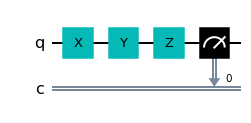

In [5]:
circ = QuantumCircuit(1, 1)
circ.x(0)
circ.y(0)
circ.z(0)
circ.measure(0, 0)
circ.draw('mpl')

### Hadamard Gate

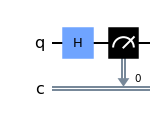

In [4]:
circ = QuantumCircuit(1, 1)
circ.h(0)
circ.measure(0, 0)
circ.draw('mpl')

### Controlled-Not Gate

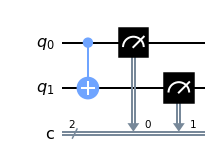

In [5]:
circ = QuantumCircuit(2, 2)
circ.cx(0, 1)
circ.measure([0,1], [0,1])
circ.draw('mpl')

## Common Basis Vectors

In [8]:
# Useful for Initializing a NewCircuit

zero = np.array([[1], [0]]) # Z plus basis state
one = np.array([[0], [1]]) # Z plus basis state

plus = np.array([[1], [1]])/np.sqrt(2) # X plus basis state
minus = np.array([[1], [-1]])/np.sqrt(2) # X minus basis state

up = np.array([[1], [1j]])/np.sqrt(2) # Y plus basis state
down = np.array([[1], [-1j]])/np.sqrt(2) # Y plus basis state

B00 = np.array([[1], [0], [0], [1]])/np.sqrt(2) # Bell of 00
B01 = np.array([[0], [1], [1], [0]])/np.sqrt(2) # Bell of 01
B10 = np.array([[1], [0], [0], [-1]])/np.sqrt(2) # Bell of 10
B11 = np.array([[0], [-1], [1], [0]])/np.sqrt(2) # Bell of 11

## Initialize New Circuit

In [9]:
def new_circuit(qubits, *initial_state, cbits = None, drawing = True):
    
    """
    
    Initialize a new circ with an arbitray statevector

    Parameters
    ----------
    no_qubits: int
        Number of qubits intitialized
    initial_state: np.array
        All the separable statevectors and non-separable statevectors

    Returns
    -------
    circ: qiskit.circuit.quantumcircuit.QuantumCircuit
        An initialized Circuit
        
    """
    
    # Default to cbits = qubits unless a specific number is given
    cbits = qubits if cbits == None else cbits
    
    # Default to all 0 states for all qubits if no initial_state is given
    initial_state = [zero for i in range(qubits)] if initial_state == () else initial_state
    
    
    if len(initial_state) == 2:
        initial_state == [initial_state]
        
    
    # Successively calculate the tensor product
    initial_state = reduce(lambda x, y: np.kron(x, y), initial_state)
    
    
    # Reshape to make statevector compatible with the initialize method
    initial_state = initial_state.reshape(2**qubits)
    
    
    # Create Circuit
    circ = QuantumCircuit(qubits, cbits)
    circ.initialize(initial_state, range(qubits))
    circ.barrier()
    
    # Draw Circuit
    if drawing:
        circ.draw('mpl')
    
    return circ

In [10]:
# Example
circ_init = new_circuit(5, B00, B11, plus)

## Representing Results

There are five step to representing the result of a circuit

### 1. Compose Circuit

### 2. Define Simulator

In [9]:
simulator = Aer.get_backend('qasm_simulator')

'''There are several different option for backend

Mathematical Simulator: 

statevector_simulator
unitary_simulator

Experimental Simulator: 

ibmq_qasm_simulator (Classical Simulation)

(The rest are real quantum machines / Providers)

ibmq_16_melbourne 
ibmq_ourense
ibmqx2
ibmq_vigo
ibmq_london
ibmq_burlington
ibmq_essex
ibmq_armonk
ibmq_valencia
ibmq_santiago'''

QiskitBackendNotFoundError: 'More than one backend matches the criteria'

### 3. Execute Circuit with Simulators

In [10]:
# For Mathematical Representation
results = execute(circ, simulator).result()

# For Experimental Representation

IBMQ.load_account()  # Enter Unique User Id here

provider = IBMQ.get_provider('ibm-q')

qcomp = provider.get_backend('ibmq_qasm_simulator')

job = execute(circuit, backend = qcomp, shots = )

job_monitor(job)

results = job.result()

SyntaxError: invalid syntax (<ipython-input-10-d46f91196108>, line 12)

### 4. Count Results

In [117]:
# Statevector
statevector = results.get_statevector(circ)

# Unitary
unitary = results.get_unitary(circ)

# Counts 
counts = results.get_counts(circ)

AttributeError: 'AerJob' object has no attribute 'get_statevector'

### 5. Display Results

In [19]:
# Plot Bloch Sphere (Represent the statevector as a ray on the Bloch Sphere)
plot_bloch_multivector(statevector)

# Plot State City (Represent the amplitude of the bases of the statevector)
plot_state_city(statevector)

# Plot Histogram (Represent counts of each measurement)
plot_histogram(counts)

SyntaxError: invalid syntax (<ipython-input-19-c79edcc7d842>, line 16)

## GHZ Generator

In [9]:
def GHZ(qubits, *initial_state, drawing = True):
    
    """
    Create a GHZ state by successive CNOT from provided statevector 
    (This is a multi-qubit entanglemnt system)

    Parameters
    ----------
    no_qubits: int
        Number of qubits intitialized
    initial_state: np.array
        All the separable statevectors and non-separable statevectors

    Returns
    -------
    circ: qiskit.circuit.quantumcircuit.QuantumCircuit
        An circuit with GHZ gates built in to it
        
    """
    
    circ = new_circuit(qubits, *initial_state, drawing = False)

    circ.h(0)
    
    for i in range(qubits-1):
        circ.cx(i, i+1)
        
    circ.barrier()
        
    # Draw Circuit
    if drawing:
        circ.draw('mpl')
    
    return circ

In [10]:
circ_body = GHZ(6)

## Measurement

In [11]:
def measurement(circ_body, qubits = None, cbits = None, bases = None, drawing = True):
    
    """
    Add Measurement Gates to Circuit

    Parameters
    ----------
    circ_body: qiskit.circuit.quantumcircuit.QuantumCircuit
        The circuit body
        
    qubits: list (default None: select all qubits)
        A list of the index of the qubits
        
    cbits:  list (default None: select all cbits)
        A list of the index of the cbits 
        
    bases: nparray of shape n, n (default = None: no added gate)
        Bases of the circuit in terms of Z-coordinates
    
    drawing: bool (default = True)
        Draw a new circuit with bases and measurement gates

    Returns
    -------
    circ: qiskit.circuit.quantumcircuit.QuantumCircuit
        A new circuit with bases conversion and measurement gates
        
    """
    
    def Bell_dagger(circ): # Measuring in the Bell Basis
        for i in range(0, n, 2):
            circ.cx(i, i+1)
            circ.h(i)
    
        return circ
    
    # Dictionary for various Measurement Bases
    bases_dict = {
                'X' : lambda circ: circ.h(range(n)),  # Measure from the X Basis
                'Y' : lambda circ: circ.rx(-np.pi/2, range(n)), # Measure from the Y Basis
                'B' : Bell_dagger # Measurement from Bell Basis
                }
    
    n = circ_body.num_qubits # Count number of qubits
    
    qubits = list(range(n)) if qubits == None else qubits
    cbits = list(range(n)) if cbits == None else cbits

    circ = QuantumCircuit(n, n) # Create a measurement circuit

    if type(bases) == str:
        bases_dict[bases](circ)
        
    elif bases == None:
        pass
        
    else:
        size = int(np.log2(bases.shape[0])) # Calculate how many qubit in a measurement
        
        # Successively apply measurement gate
        if len(qubits) % size != 0:
            raise IndexError("Size of gates is incompatible with number of qubits, quit you stupid mf")

        for i in range(0, len(qubits), size):
            
            # Apply successive unitary gate to selected qubits
            circ.unitary(bases, qubits[i:i+size])

        circ.barrier(range(n))

    # Measure
    
    circ.measure(qubits, cbits)
        
    # Draw Circuit
    if drawing:
        circ.draw('mpl')
        
        return circ

In [12]:
class qc_hub:
    
    circuits = []
        
    # Initiate new circuit object
    def __init__(self, name):
        
        self.name = name
        
        self.init = []
        self.body = []
        self.measurement = []
        
        self.full_circuit = [self.init, self.body, self.measurement]
        
        qc_hub.circuits.append((self, name))
    
    # Delete all circuit instances from list
    def reset():
        qc_hub.circuits = []
    
    # Add new circuit instances
    def add(self, circ, part_name, section = 'body'):
        
        component = {
            'init': self.init,
            'body': self.body,
            'meas': self.measurement
        }
        
        # Add circ to the appropriate section
        component[section].append((circ, part_name))
        
    # Delete instance
    def delete(self):
        for instances in qc_hub.circuits:
            if instances[1] == self.name:
                qc_hub.circuits.remove(instances)
                
    def concatenate(self):
        return reduce(lambda a, b: a[0][0]+b[0][0], self.full_circuit)

In [13]:
DJ = qc_hub('DJ')

In [583]:
DJ.add(qc(4), 'Oracle', 'body')

In [584]:
DJ.add(qc(4), 'Hadamard and Phase Kickback', 'init')

In [585]:
DJ.add(qc(4), 'Measurement', 'meas')

In [587]:
DJ.concatenate()

IndexError: list index out of range

In [2]:
a = Initialize([0, 1])

NameError: name 'Initialize' is not defined

In [6]:
from qiskit.extensions import *

In [8]:
init_gate = Initialize([0, 1])
init_gate.label = "init"

In [16]:
init_gate.decompositions

[]

In [22]:
init_gate.broadcast_arguments(qr, cr)

<generator object Initialize.broadcast_arguments at 0x7f9c8e184e50>

In [19]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

In [547]:
a = {1: 'a', 2: 'b'}
a

{1: 'a', 2: 'b'}

In [ ]:
# Do representation function

## Quantum Algorithms

### Quantum Teleportation

$\psi$